# Logistic Regression

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [2]:
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [3]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [4]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.2"

In [5]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [6]:
# Fitting Logistic Regression to the Training set
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set)

In [7]:
# Predicting the Test set results
prob_pred = predict(classifier, type = 'response', newdata = test_set[-3])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [8]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred )

In [9]:
# load Caret package for computing Confusion matrix
library(e1071)
library(caret)
confusionMatrix(cm)

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Confusion Matrix and Statistics

   y_pred
     0  1
  0 57  7
  1 10 26
                                          
               Accuracy : 0.83            
                 95% CI : (0.7418, 0.8977)
    No Information Rate : 0.67            
    P-Value [Acc > NIR] : 0.0002624       
                                          
                  Kappa : 0.6242          
                                          
 Mcnemar's Test P-Value : 0.6276258       
                                          
            Sensitivity : 0.8507          
            Specificity : 0.7879          
         Pos Pred Value : 0.8906          
         Neg Pred Value : 0.7222          
             Prevalence : 0.6700          
         Detection Rate : 0.5700          
   Detection Prevalence : 0.6400          
      Balanced Accuracy : 0.8193          
                                          
       'Positive' Class : 0               
                                          

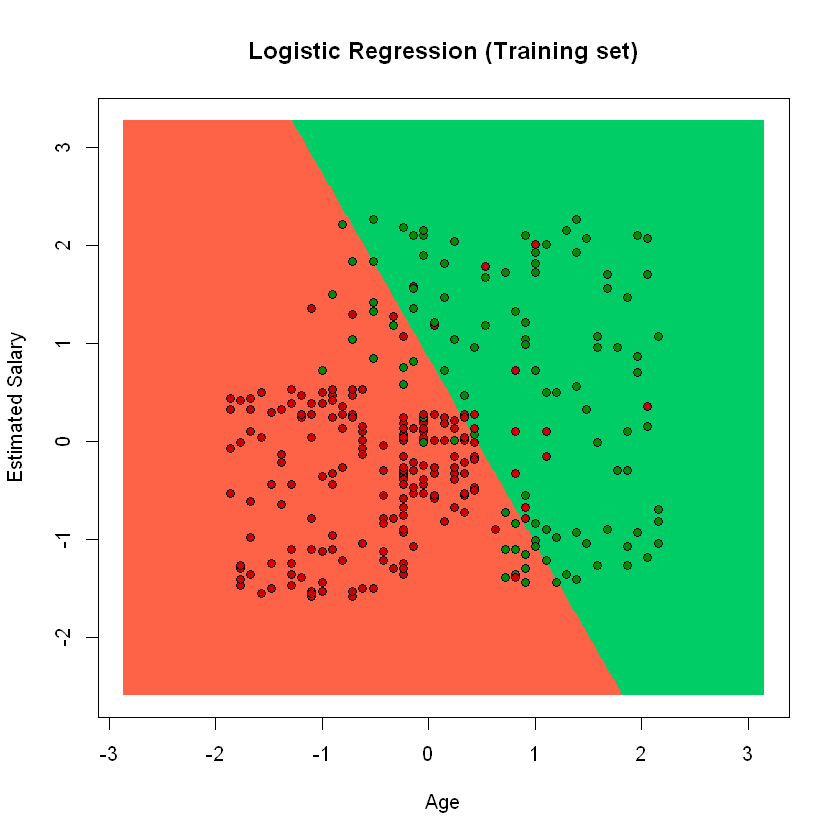

In [10]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

In [ ]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))